In [54]:
import numpy as np
from pymanopt.manifolds import Sphere

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage

import mala.utils as my
import mala.potentials
import mala.metropolis_hastings as vanilla_mh
import mala.MA_metropolis_hastings as mamh
import mala.icosehedron as ico

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
H = mala.potentials.Spherical(ambient_dim=3,proper_dim=2)
face_graph,vertex_graph,face_dict = ico.generate_icosahedron()

In [56]:
from test_icosehedron import test_chart_maps,test_transitions

face_graph,vertex_graph,face_dict = ico.generate_icosahedron()

# tests generation of icosahedron face graph, transformations into/out
# of chart image
test_chart_maps()
test_transitions()

current x: in face?  [2, 2, 2]


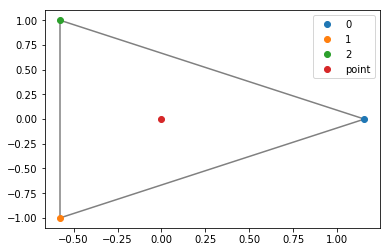

current x: in face?  [2, 2, 2]


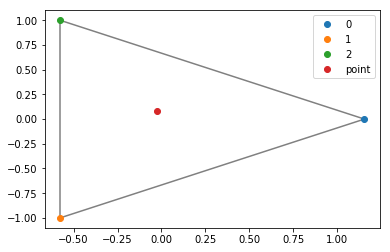

current x: in face?  [2, 2, 2]


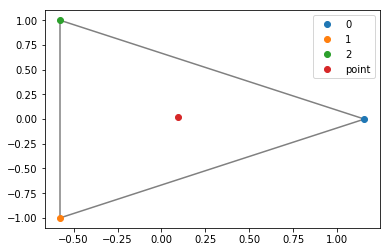

current x: in face?  [2, 2, 2]


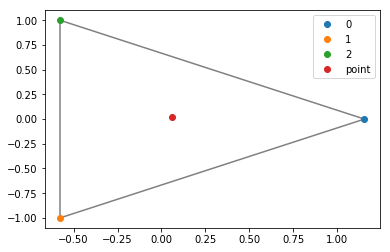

current x: in face?  [2, 2, 2]


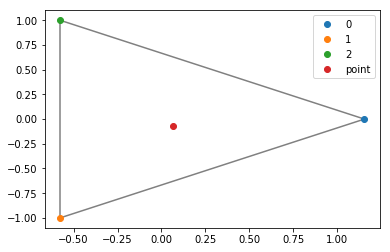

current x: in face?  [2, 2, 2]


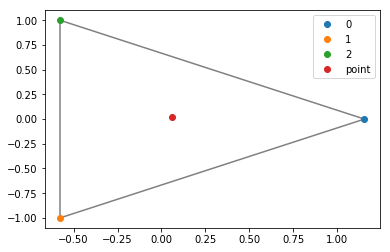

current x: in face?  [2, 2, 2]


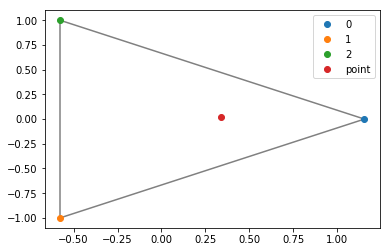

current x: in face?  [2, 2, 2]


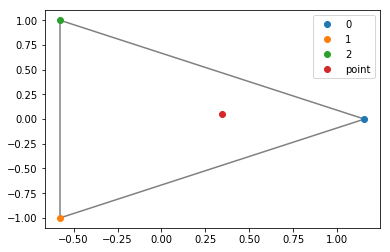

current x: in face?  [2, 2, 2]


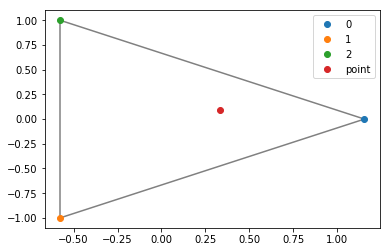

current x: in face?  [2, 2, 2]


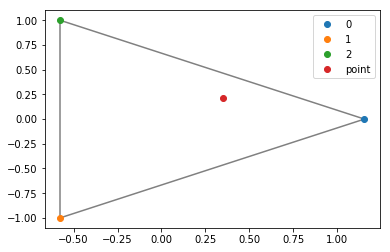

current x: in face?  [2, 2, 2]


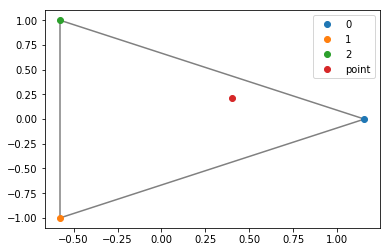

current x: in face?  [2, 2, 2]


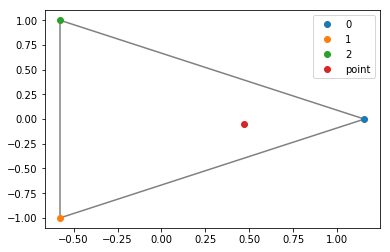

current x: in face?  [2, 2, 2]


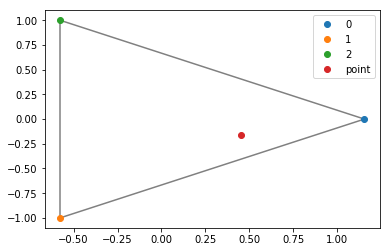

current x: in face?  [2, 2, 2]


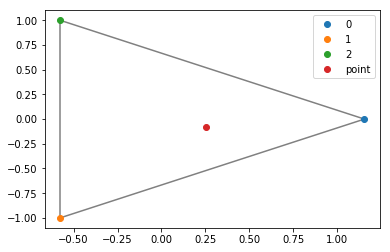

current x: in face?  [2, 2, 2]


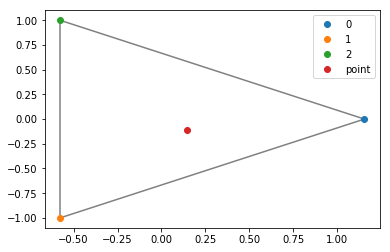

current x: in face?  [2, 2, 2]


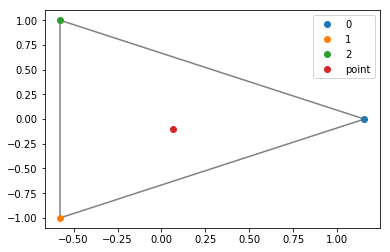

current x: in face?  [2, 2, 2]


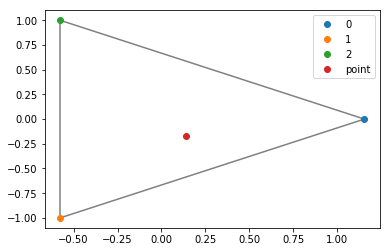

current x: in face?  [2, 2, 2]


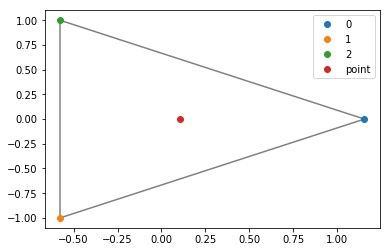

current x: in face?  [2, 2, 2]


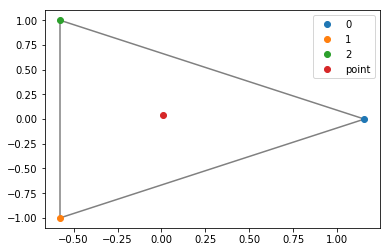

current x: in face?  [2, 2, 2]


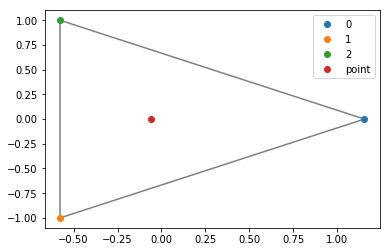

current x: in face?  [2, 2, 2]


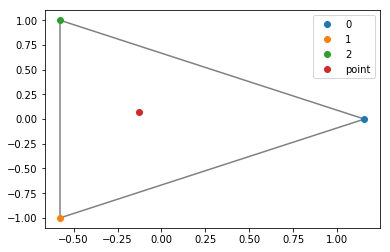

current x: in face?  [2, 2, 2]


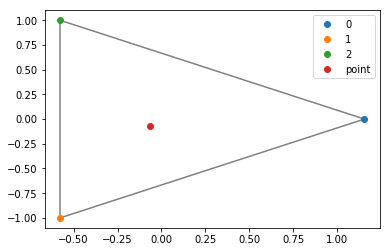

current x: in face?  [2, 2, 2]


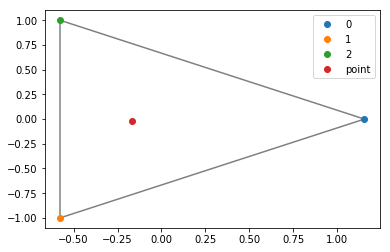

current x: in face?  [2, 2, 2]


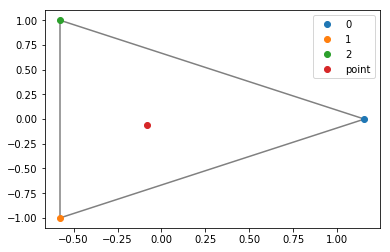

current x: in face?  [2, 2, 2]


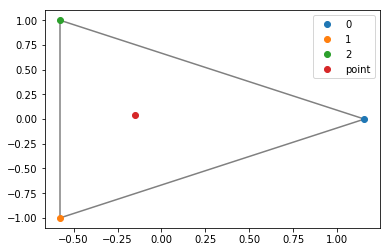

current x: in face?  [2, 2, 2]


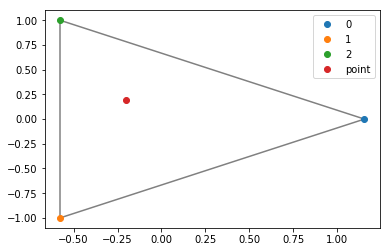

current x: in face?  [2, 2, 2]


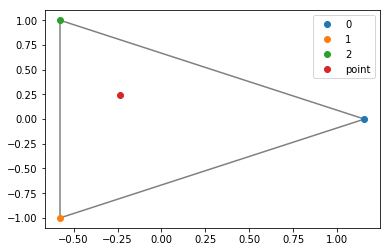

current x: in face?  [2, 2, 2]


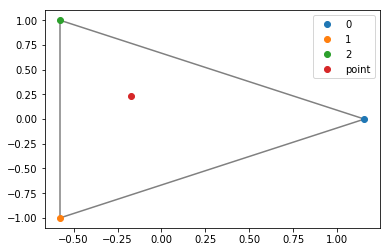

current x: in face?  [2, 2, 2]


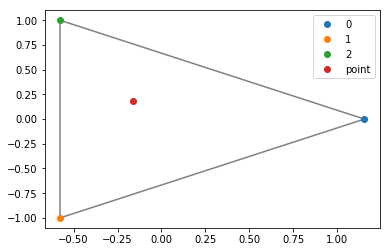

current x: in face?  [2, 2, 2]


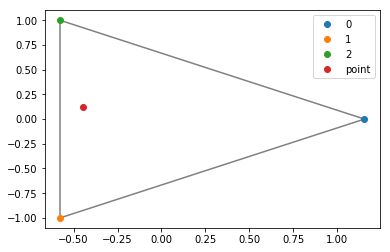

current x: in face?  [2, 2, 2]


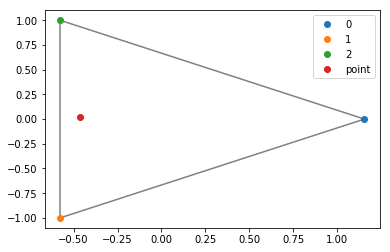

current x: in face?  [2, 2, 2]


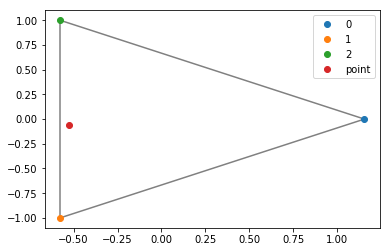

current x: in face?  [2, 2, 2]


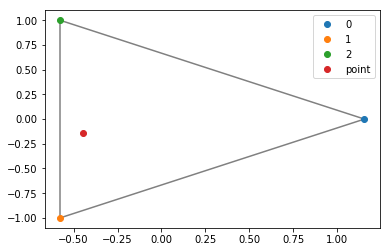

current x: in face?  [2, 2, 2]


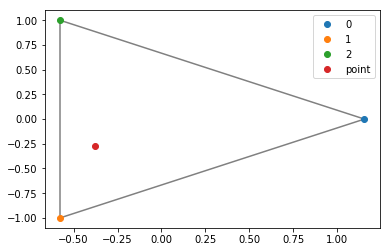

current x: in face?  [2, 2, 2]


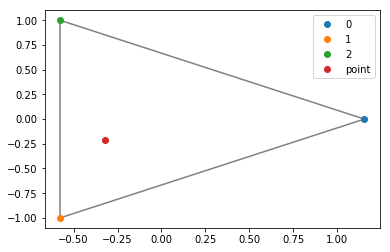

current x: in face?  [2, 2, 2]


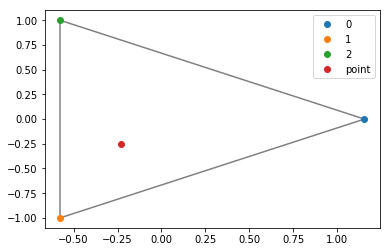

current x: in face?  [2, 2, 2]


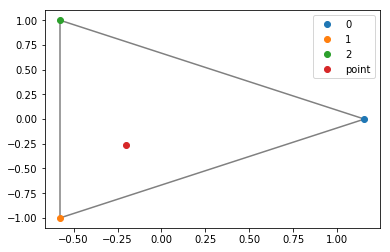

current x: in face?  [2, 2, 2]


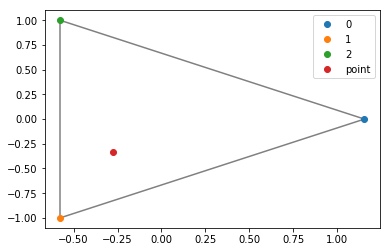

current x: in face?  [2, 2, 2]


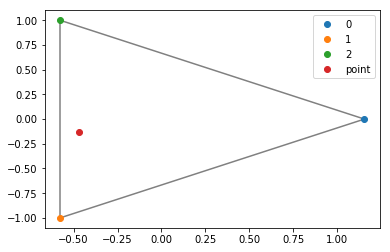

current x: in face?  [2, 2, 2]


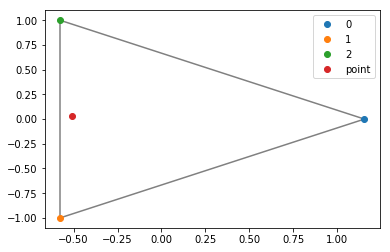

current x: in face?  [2, 2, 2]


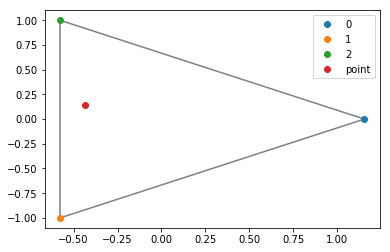

current x: in face?  [1, 1, 2]


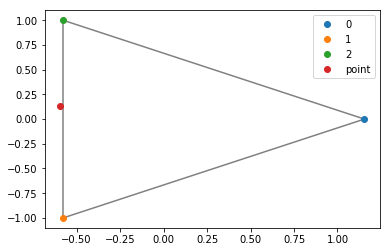

current x: in face?  [2, 2, 2]


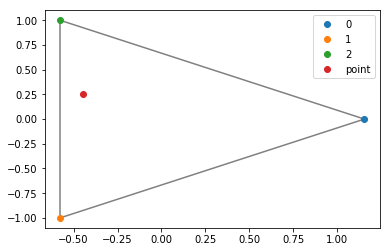

current x: in face?  [2, 1, 2]


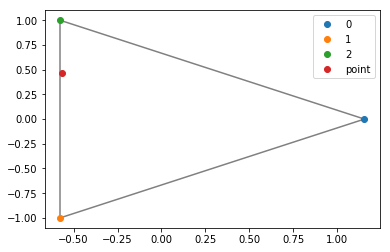

current x: in face?  [2, 1, 2]


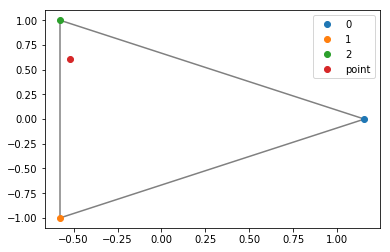

current x: in face?  [2, 1, 2]


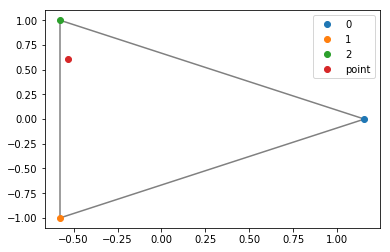

current x: in face?  [2, 1, 2]


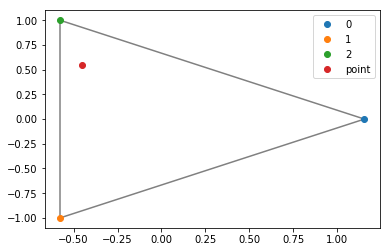

current x: in face?  [2, 1, 2]


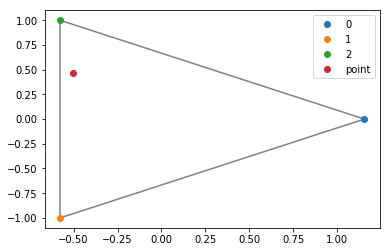

current x: in face?  [2, 1, 2]


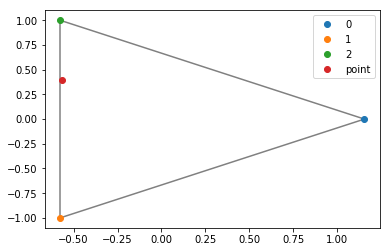

current x: in face?  [2, 1, 2]


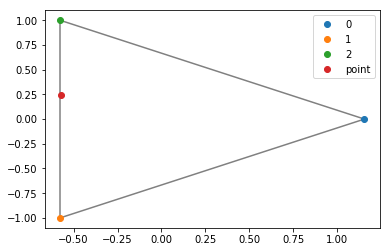

current x: in face?  [1, 1, 2]


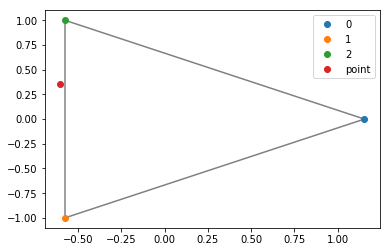

current x: in face?  [2, 1, 2]


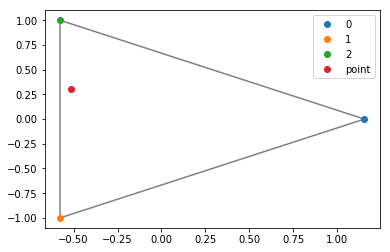

current x: in face?  [1, 1, 2]


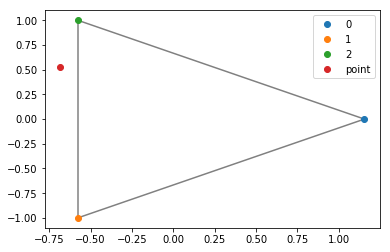

current x: in face?  [1, 1, 2]


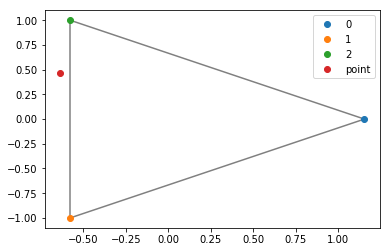

current x: in face?  [2, 1, 2]


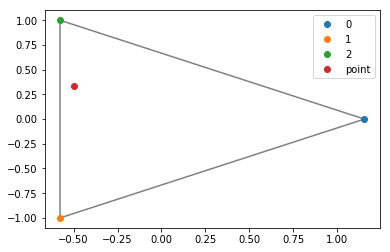

current x: in face?  [1, 1, 2]


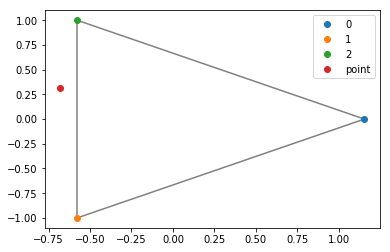

current x: in face?  [1, 1, 2]


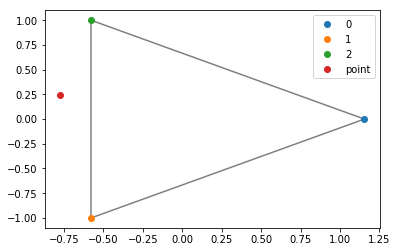

current x: in face?  [1, 1, 2]


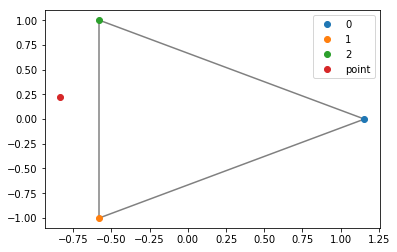

current x: in face?  [2, 2, 2]


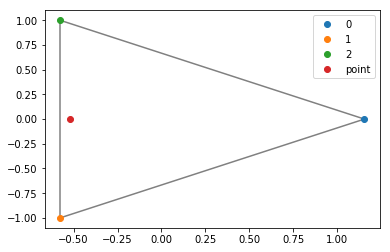

current x: in face?  [1, 2, 2]


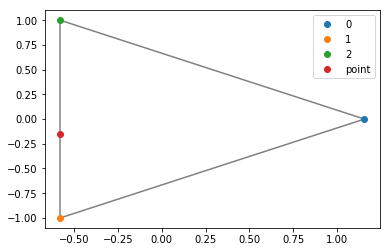

current x: in face?  [1, 2, 2]


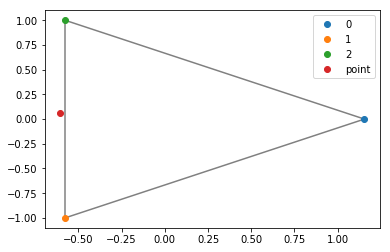

current x: in face?  [2, 2, 2]


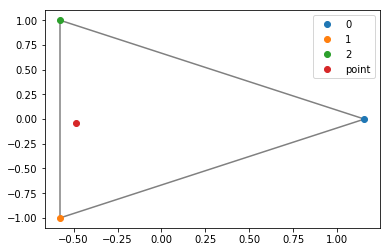

current x: in face?  [2, 2, 2]


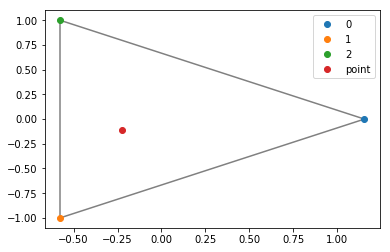

current x: in face?  [2, 2, 2]


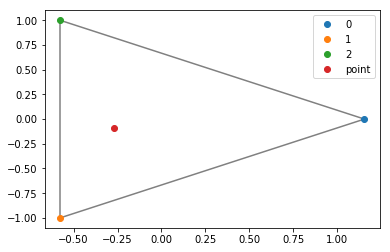

current x: in face?  [2, 2, 2]


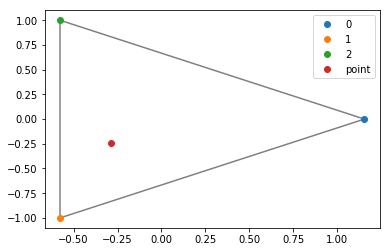

current x: in face?  [2, 2, 2]


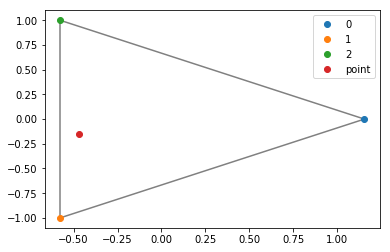

current x: in face?  [2, 2, 2]


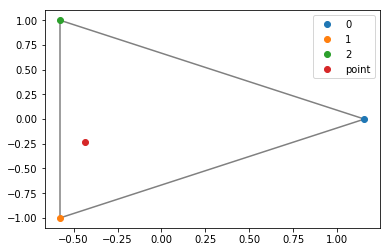

current x: in face?  [2, 2, 2]


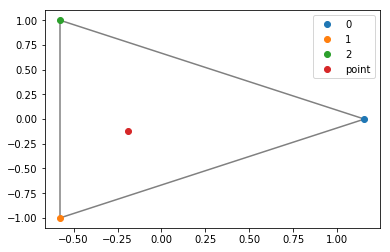

current x: in face?  [2, 2, 2]


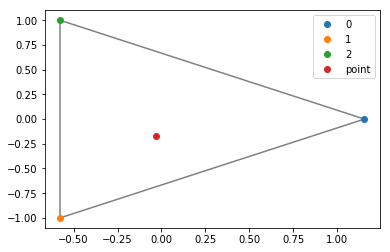

current x: in face?  [2, 2, 2]


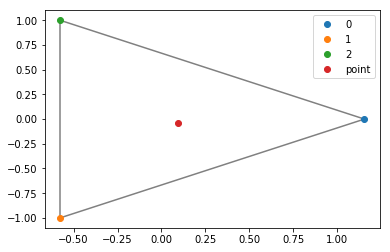

current x: in face?  [2, 2, 2]


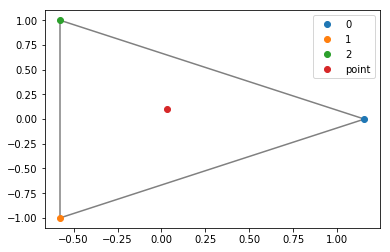

current x: in face?  [2, 2, 2]


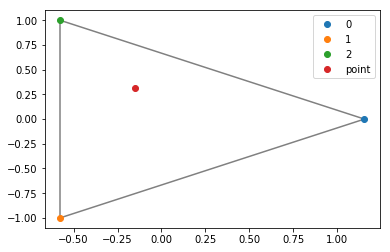

current x: in face?  [2, 2, 2]


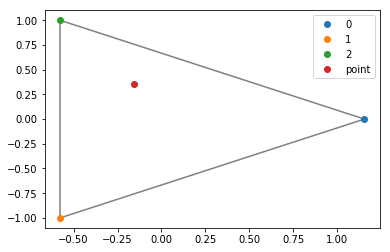

current x: in face?  [2, 2, 2]


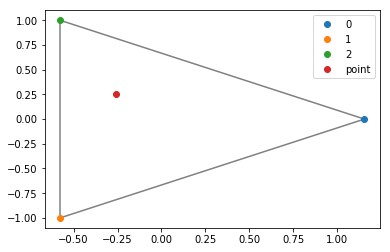

current x: in face?  [2, 2, 2]


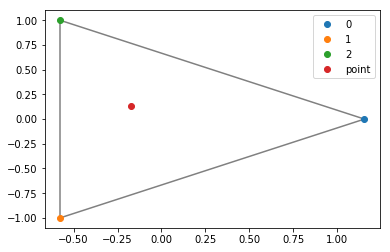

current x: in face?  [2, 2, 2]


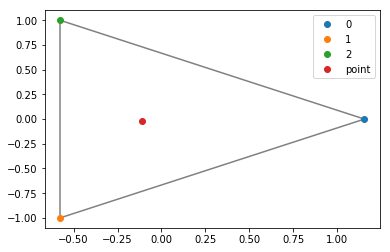

current x: in face?  [2, 2, 2]


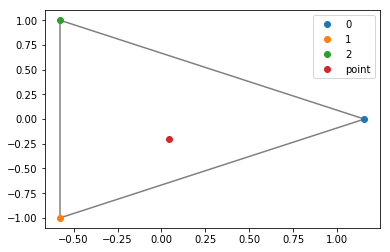

current x: in face?  [2, 2, 2]


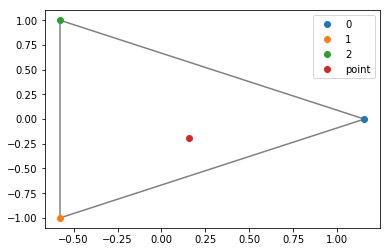

current x: in face?  [2, 2, 2]


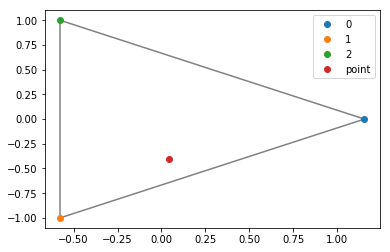

current x: in face?  [2, 2, 2]


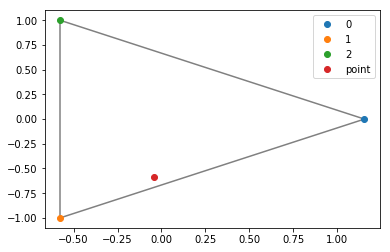

current x: in face?  [2, 2, 2]


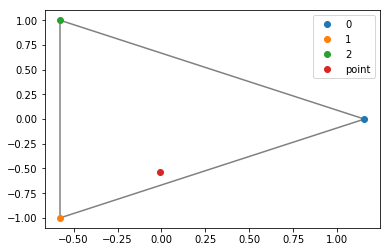

current x: in face?  [2, 2, 2]


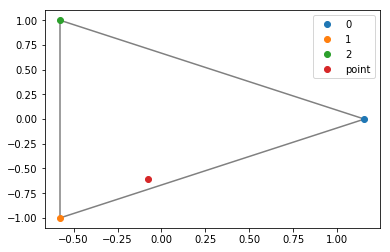

current x: in face?  [2, 2, 2]


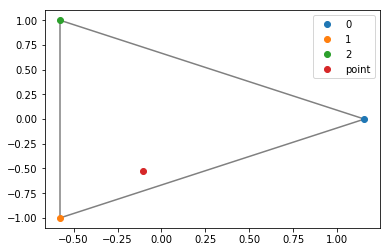

current x: in face?  [2, 2, 2]


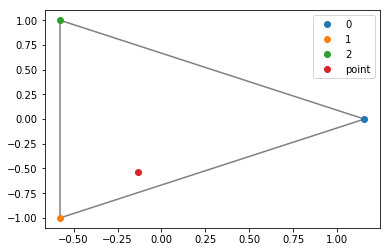

current x: in face?  [2, 2, 1]


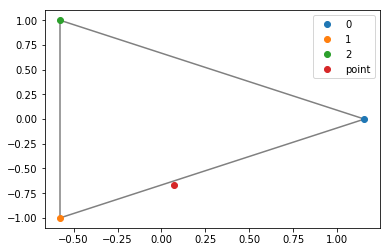

current x: in face?  [2, 2, 2]


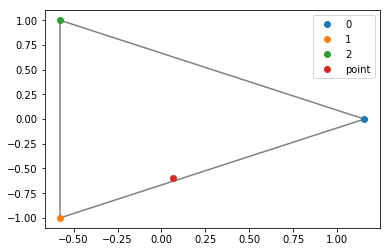

current x: in face?  [2, 2, 2]


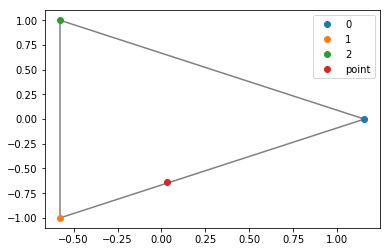

current x: in face?  [2, 2, 1]


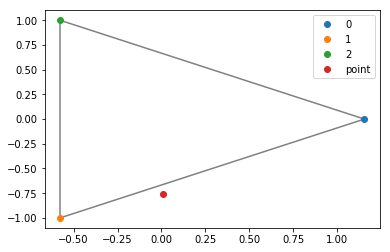

current x: in face?  [2, 2, 1]


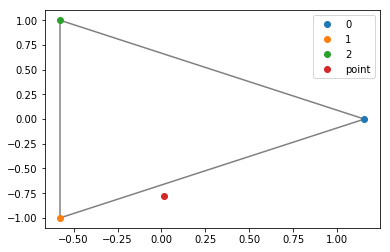

current x: in face?  [2, 2, 1]


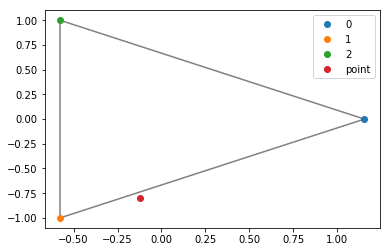

current x: in face?  [2, 2, 1]


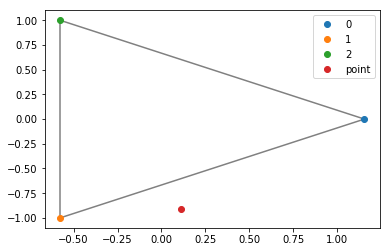

current x: in face?  [2, 2, 1]


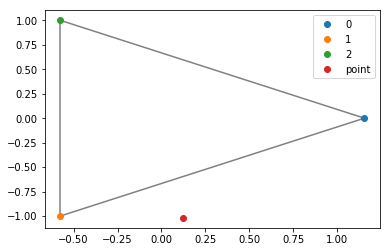

current x: in face?  [2, 2, 1]


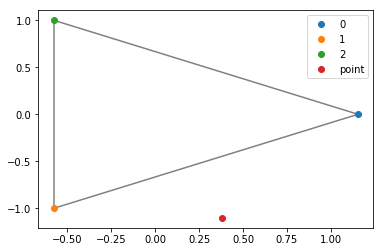

current x: in face?  [2, 2, 1]


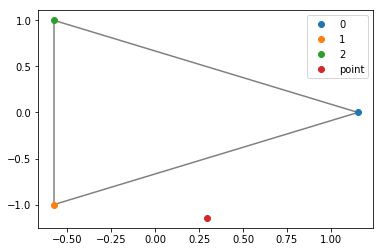

current x: in face?  [2, 2, 1]


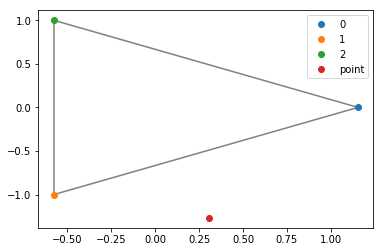

current x: in face?  [2, 2, 1]


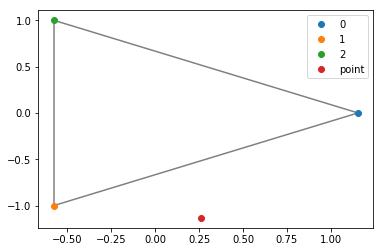

current x: in face?  [2, 2, 1]


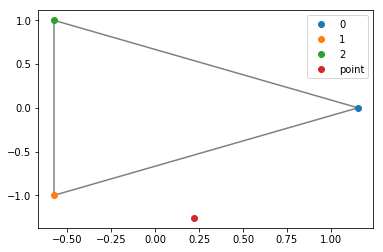

current x: in face?  [2, 2, 1]


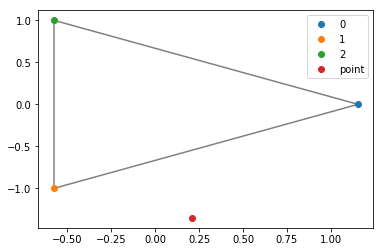

current x: in face?  [2, 2, 1]


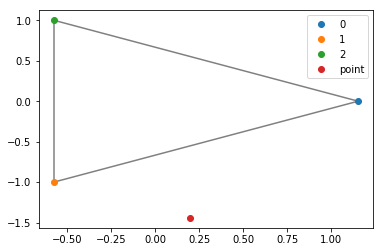

current x: in face?  [2, 2, 1]


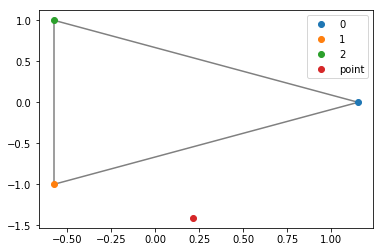

In [61]:
%matplotlib inline
T = 100
# note: our faces' circumcircle is about 1.15, so we want our step size
# to be small relative to that
step_size = 0.1

trajectory = mamh.ico_MAMH(H,T,step_size)

<IPython.core.display.Javascript object>


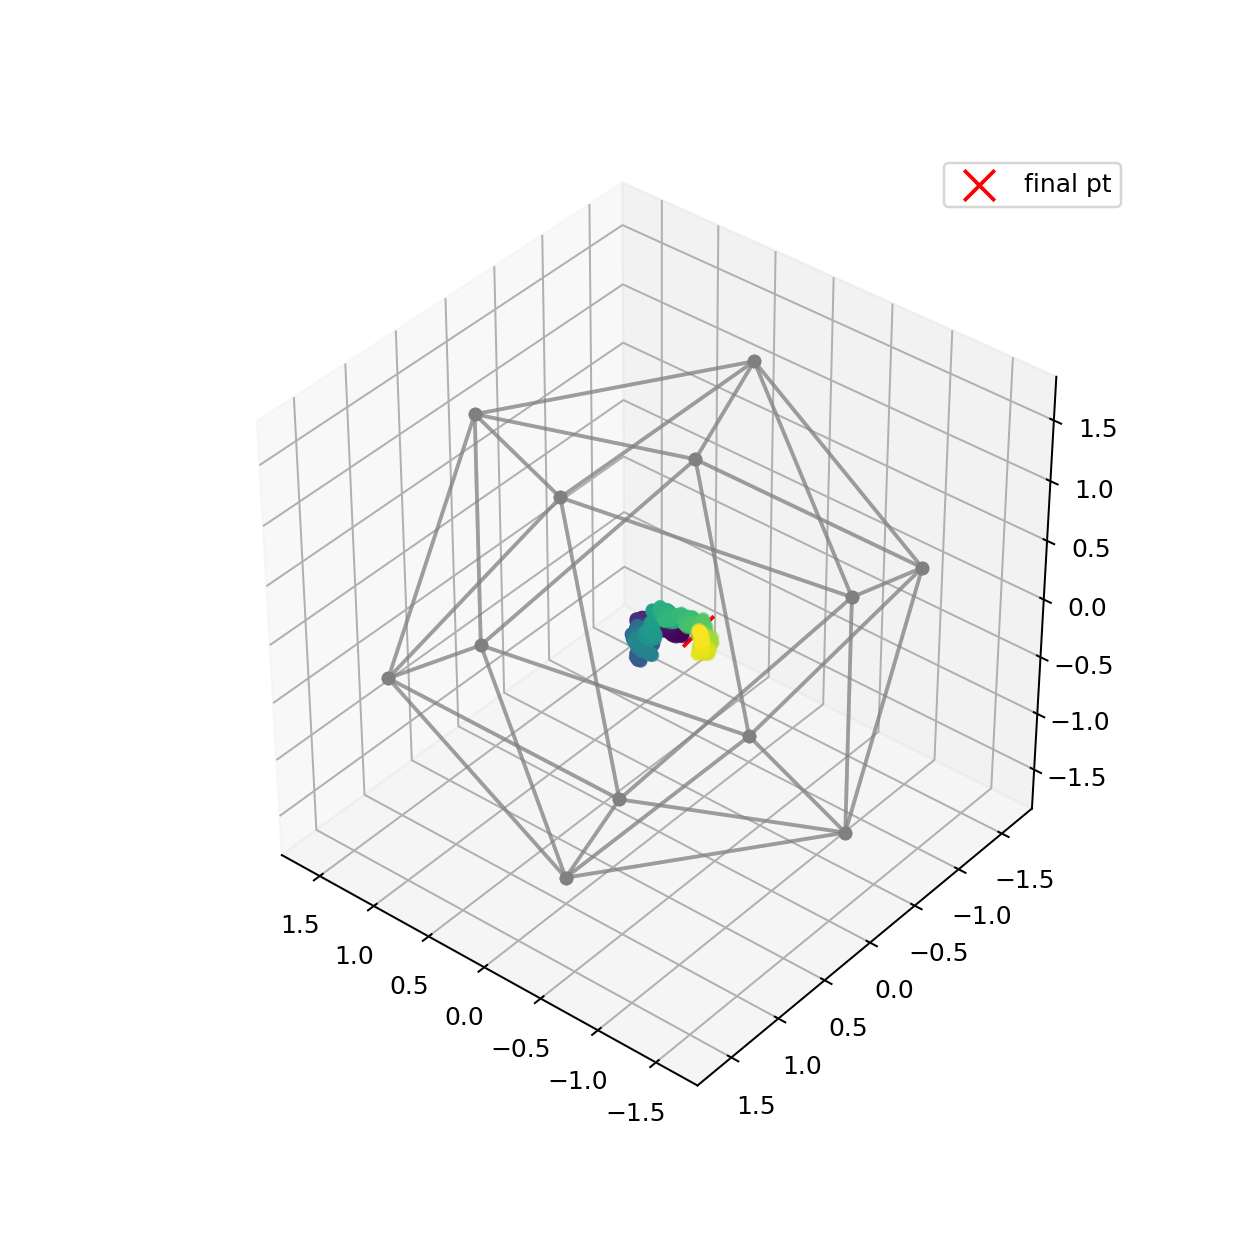

In [76]:
%matplotlib notebook
my.plot_on_icosahedron(H,trajectory)